### Pokemon Prediction

In [12]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('pokemon.csv')
df.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

In [15]:
df.describe()

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,...,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,439.226744,69.906008,80.526163,74.609496,72.918605,72.139535,68.548450,438.648256,73.108043,20.028104,...,1.002180,1.239826,1.025678,0.974806,1.074855,0.992006,1.094234,1.286822,71.879845,136.735756
std,261.871350,26.189155,32.542374,30.905972,32.773495,27.625876,30.219526,120.675545,20.112591,10.830298,...,0.613111,0.699361,0.577269,0.378040,0.475292,0.511859,0.535159,1.391501,132.872741,3111.666658
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,...,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,211.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.801910,...,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,434.500000,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,459.000000,76.500000,18.484228,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,667.250000,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.835709,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.275000,42.200000
max,898.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


In [16]:
# Check Column Type 1 for balancing
df['Type 1'].value_counts()

Type 1
Water       131
Normal      114
Grass        91
Bug          81
Psychic      77
Fire         64
Rock         59
Electric     59
Dark         46
Dragon       42
Fighting     42
Ground       41
Ghost        41
Poison       40
Ice          38
Steel        36
Fairy        22
Flying        8
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()

df['Type1_Numeric'] = le.fit_transform(df['Type 1'])
print(df['Type1_Numeric'])
 
 
# Fit and transform the 'city' column
df['Abilities_Numeric'] = le.fit_transform(df['Abilities'])
print(df['Abilities_Numeric'])
 
df_numeric = df.select_dtypes(include=[int, float])
 
df_numeric.corr().style.background_gradient(cmap='coolwarm', axis=None)
 

0        9
1        9
2        9
3        9
4        6
        ..
1027    11
1028     8
1029    14
1030    14
1031    14
Name: Type1_Numeric, Length: 1032, dtype: int32
0        93
1        93
2        93
3       582
4        67
       ... 
1027     78
1028    245
1029    590
1030     37
1031     37
Name: Abilities_Numeric, Length: 1032, dtype: int32


,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Type1_Numeric,Abilities_Numeric
Number,1.000000,0.108518,0.123581,0.093584,0.092315,0.076661,0.024718,0.129655,0.129655,0.025323,0.805655,0.095644,0.055645,-0.092145,0.228640,-0.151061,-0.194987,-0.104102,-0.152313,0.032393,-0.058933,-0.074894,-0.079718,0.022856,-0.016521,0.040218,-0.000845,0.010805,-0.080341,-0.001180,-0.036093,0.087863,0.025943,0.039492,0.066956,0.153700,0.042423,0.122692,0.042095,-0.081345,-0.047421
HP,0.108518,1.000000,0.448109,0.270759,0.367900,0.364979,0.182416,0.636355,0.636355,0.319102,0.089622,0.244082,0.524300,-0.459963,0.340909,0.079427,-0.054379,0.023329,0.047553,-0.103277,-0.008812,-0.036120,0.029426,0.071669,0.094940,-0.022460,-0.021432,-0.052206,-0.031555,0.027286,-0.051314,-0.042344,0.131821,0.009546,0.028108,0.141482,0.443746,0.440130,-0.032756,0.071032,0.033169
Att,0.123581,0.448109,1.000000,0.462794,0.368953,0.272079,0.375853,0.742052,0.742052,0.338257,0.190524,0.291736,0.548398,-0.511626,0.356756,0.327814,-0.008982,0.020633,-0.097774,-0.019338,0.098728,-0.104767,0.016685,0.059080,0.133166,-0.178090,0.054986,-0.009082,-0.006698,-0.059827,-0.118487,-0.006141,0.127855,-0.097930,0.010166,0.206421,0.425432,0.427314,-0.049515,-0.022454,0.104344
Def,0.093584,0.270759,0.462794,1.000000,0.220302,0.528080,-0.005132,0.619106,0.619106,0.449801,0.128255,0.153061,0.476796,-0.430680,0.273600,0.235724,-0.003108,-0.005959,-0.286521,0.056880,0.137672,-0.100459,0.107886,-0.005707,0.133639,-0.238199,0.197417,-0.131247,-0.097682,-0.057604,-0.167991,0.142700,-0.038324,0.058447,0.048914,-0.014090,0.362805,0.469828,0.059071,0.109086,0.103570
Spa,0.092315,0.367900,0.368953,0.220302,1.000000,0.514828,0.443517,0.736265,0.736265,0.203043,0.115706,0.235198,0.544006,-0.507363,0.429123,0.293041,-0.082822,-0.035270,-0.019172,-0.119742,-0.074193,0.005418,-0.107171,0.014011,-0.177805,0.055495,0.046143,-0.105017,-0.110682,0.073850,0.065894,0.269777,0.092446,0.213719,-0.062613,0.024121,0.383695,0.238078,-0.044129,0.001041,0.044392
Spd,0.076661,0.364979,0.272079,0.528080,0.514828,1.000000,0.219159,0.711452,0.711452,0.345154,0.097708,0.119959,0.580761,-0.504916,0.352845,0.230942,-0.045172,0.001326,-0.096543,-0.009026,-0.049529,0.005147,-0.065461,-0.020337,-0.084794,0.001854,0.027272,-0.058729,-0.090328,0.015744,-0.011937,0.210760,-0.040481,0.148679,0.079080,0.018332,0.322137,0.303296,0.065807,0.031223,0.039661
Spe,0.024718,0.182416,0.375853,-0.005132,0.443517,0.219159,1.000000,0.560673,0.560673,0.049156,0.065539,0.207729,0.441462,-0.410458,0.354407,0.190137,-0.006340,-0.006741,0.102638,-0.106777,-0.065703,0.091644,-0.141127,0.075964,-0.061727,0.019035,-0.094436,-0.036081,-0.026595,-0.020782,0.125646,0.015344,0.118629,0.017516,-0.079070,0.116826,0.197547,0.052252,-0.035814,-0.102239,0.032509
BST,0.129655,0.636355,0.742052,0.619106,0.736265,0.711452,0.560673,1.000000,1.000000,0.422135,0.173879,0.314200,0.775027,-0.704259,0.526330,0.346077,-0.049442,-0.001863,-0.091032,-0.074386,0.012029,-0.036220,-0.040917,0.048197,0.007583,-0.093642,0.055863,-0.098393,-0.091069,-0.006508,-0.039485,0.151059,0.098818,0.087097,0.002667,0.122764,0.531366,0.478253,-0.011221,0.019126,0.091138
Mean,0.129655,0.636355,0.742052,0.619106,0.736265,0.711452,0.560673,1.000000,1.000000,0.422135,0.173879,0.314200,0.775027,-0.704259,0.526330,0.346077,-0.049442,-0.001863,-0.091032,-0.074386,0.012029,-0.036220,-0.040917,0.048197,0.007583,-0.093642,0.055863,-0.098393,-0.091069,-0.006508,-0.039485,0.151059,0.098818,0.087097,0.002667,0.122764,0.531366,0.478253,-0.011221,0.019126,0.091138
Standard Deviation,0.025323,0.319102,0.3

### ANN - Multi Class

In [23]:
from sklearn.model_selection import train_test_split
import datetime
import torch.utils.benchmark as benchmark
from sklearn.metrics import f1_score, confusion_matrix
# Define all Against Columns
# against_columns = [col for col in df.columns if 'Against' in col]

X = df.iloc[:, 23:41].to_numpy()
# X = df[against_columns].to_numpy()
Y = df['Type1_Numeric'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Transform to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

class PokemonANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=18, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.output = nn.Linear(in_features=128, out_features=18)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.output(x)
        return x

model = PokemonANN()

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100

begin_time = datetime.datetime.now()
for epoch in range(epochs):
    optimizer.zero_grad()
    y_hat = model.forward(X_train)
    loss = loss_function(y_hat, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} Loss: {loss}')
end_time = datetime.datetime.now()

elapsed_time_ms = end_time.microsecond - begin_time.microsecond
print(f'Total training time: {elapsed_time_ms} micro seconds')

model.eval()

# No compution with gradients during evaluation
with torch.no_grad():  
    y_val = model.forward(X_test) 
    y_pred_labels = torch.argmax(y_val, dim=1) 

# Convert tensors to NumPy arrays
y_pred_labels = y_pred_labels.numpy()  
y_test = y_test.numpy()  

f1 = f1_score(y_test, y_pred_labels, average='weighted')
print(f'F1 Score: {f1:.4f}')

Epoch: 0 Loss: 2.86538028717041
Epoch: 10 Loss: 0.42941898107528687
Epoch: 20 Loss: 0.22984063625335693
Epoch: 30 Loss: 0.15879254043102264
Epoch: 40 Loss: 0.13086019456386566
Epoch: 50 Loss: 0.12527936697006226
Epoch: 60 Loss: 0.13433966040611267
Epoch: 70 Loss: 0.12747928500175476
Epoch: 80 Loss: 0.12205766886472702
Epoch: 90 Loss: 0.12190650403499603
Total training time: 183134 micro seconds


NameError: name 'y_pred_labels' is not defined

### ANN - Multi Class for automatic paramater tuning

In [19]:
from sklearn.model_selection import train_test_split
# Hyperparameter tuning
import optuna
from sklearn.metrics import f1_score, confusion_matrix

# Define all Against Columns
# against_columns = [col for col in df.columns if 'Against' in col]

X = df.iloc[:, 23:41].to_numpy()
# X = df[against_columns].to_numpy()
Y = df['Type1_Numeric'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Transform to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

best_conf_matrix = None
best_f1_score = float('-inf')

class PokemonANN(nn.Module):
    def __init__(self, input_size, hidden_size1, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.output = nn.Linear(hidden_size1, output_size)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.output(x)
        return x
    
def objective(trial, X_train, y_train, X_test, y_test):
    global best_conf_matrix, best_f1_score
    # Define the hyperparameters to tune
    hidden_size1 = trial.suggest_int('hidden_size1', 128, 512)
    learning_rate_optuna = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

    model = PokemonANN(input_size=18, hidden_size1=hidden_size1, output_size=18)

    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate_optuna)

    epochs = 100
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_hat = model.forward(X_train)
        loss = loss_function(y_hat, y_train)
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
                    val_y_hat = model.forward(X_train)
                    val_loss = loss_function(val_y_hat, y_train)
                    trial.report(val_loss, epoch)
 
            # Prune the trial if necessary (based on Optuna's pruning mechanism)
        if trial.should_prune():
            raise optuna.TrialPruned()
    
    model.eval()

    # No compution with gradients during evaluation
    with torch.no_grad():  
        y_val = model.forward(X_test) 
        y_pred_labels = torch.argmax(y_val, dim=1) 

    # Convert tensors to NumPy arrays
    y_pred_labels = y_pred_labels.numpy()  
    y_test = y_test.numpy()  

    f1 = f1_score(y_test, y_pred_labels, average='weighted') # 'Weighted' handles class imbalances
    conf_matrix  = confusion_matrix(y_test, y_pred_labels)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_conf_matrix = conf_matrix    
    
    return f1

### Hyperparameter Tuning

In [22]:
study = optuna.create_study(direction='maximize')   
# begin_time_tuning = datetime.datetime.now()
# study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)
# end_time_tuning = datetime.datetime.now()
# elapsed_time_ms_tuning = end_time_tuning.microsecond - begin_time_tuning.microsecond
# print(f"Best trial: {study.best_trial.params}")
# print(f"Best F1 Score: {study.best_value:.4f}")

# best_trial = study.best_trial
# print(f"Best Hyperparameters: {best_trial.params}")

# print(f'Total tuning time: {elapsed_time_ms} micro seconds')

import torch.utils.benchmark as benchmark

# Define the Timer for the optimization process
timer = benchmark.Timer(
    stmt="""
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=300)
""",
    globals={
        'study': study,
        'objective': objective,
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test
    }
)

# Run the timing
results = timer.timeit(1)  # We only need to run it once since `n_trials=100` already covers the loop

# Print the results
print(f"Total time for 100 trials: {results.mean} seconds")

print(f"Best trial: {study.best_trial.params}")
print(f"Best F1 Score: {study.best_value:.4f}")

best_trial = study.best_trial
print(f"Best Hyperparameters: {best_trial.params}")

print(f'Total tuning time: {elapsed_time_ms} micro seconds')

[I 2024-09-26 11:58:15,143] A new study created in memory with name: no-name-5054a9f1-958e-42d2-97cf-f2a969709f3c
[I 2024-09-26 11:58:15,338] Trial 0 finished with value: 0.4246253583982777 and parameters: {'hidden_size1': 346, 'lr': 0.00012607142328117653}. Best is trial 0 with value: 0.4246253583982777.
[I 2024-09-26 11:58:15,465] Trial 1 finished with value: 0.852719145939799 and parameters: {'hidden_size1': 173, 'lr': 0.0007790044745854071}. Best is trial 1 with value: 0.852719145939799.
[I 2024-09-26 11:58:15,608] Trial 2 finished with value: 0.09154357116313637 and parameters: {'hidden_size1': 252, 'lr': 3.1203048432458184e-05}. Best is trial 1 with value: 0.852719145939799.
[I 2024-09-26 11:58:15,769] Trial 3 finished with value: 0.9048115608404562 and parameters: {'hidden_size1': 376, 'lr': 0.004551746221295335}. Best is trial 3 with value: 0.9048115608404562.
[I 2024-09-26 11:58:15,884] Trial 4 finished with value: 0.8995866442967893 and parameters: {'hidden_size1': 193, 'lr':

Total time for 100 trials: 7.805356200027745 seconds
Best trial: {'hidden_size1': 376, 'lr': 0.004551746221295335}
Best F1 Score: 0.9048
Best Hyperparameters: {'hidden_size1': 376, 'lr': 0.004551746221295335}
Total tuning time: 217257 micro seconds


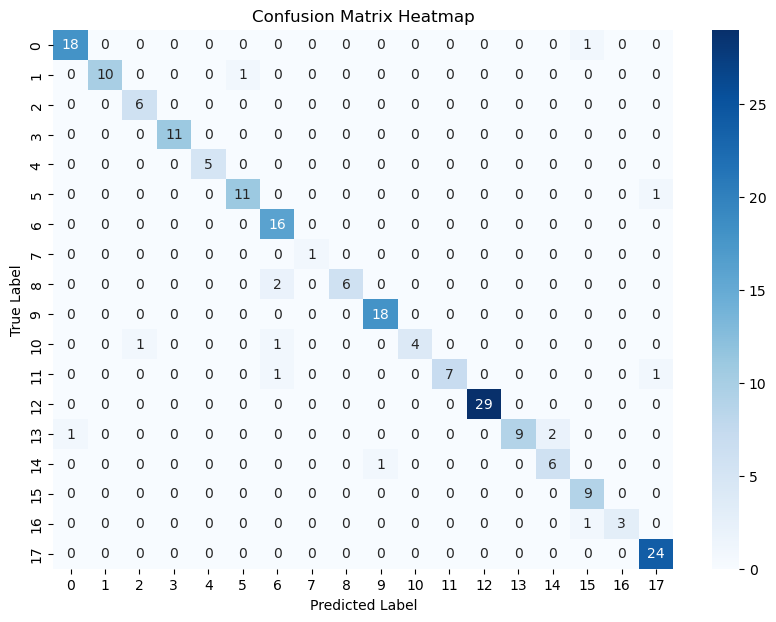

In [21]:
best_conf_matrix = np.array([
    [18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
    [ 0, 10,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
    [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  2,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  1],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 29,  0,  0,  0,  0,  0],
    [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  2,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  6,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  3,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 24]
])

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(best_conf_matrix, annot=True, fmt='g', cmap='Blues')

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()